# Sales Analysis

### Import Necessary Libraries

In [107]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

#### Merging 12 months of sales data into a single file

In [108]:
files = [file for file in os.listdir('./SalesAnalysis/Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./SalesAnalysis/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)



#### Read in updated dataframe

In [109]:
all_data = pd.read_csv('all_data.csv')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Clean Up the Data

#### Drop rows of NaN

In [110]:
nan_df = all_data[all_data.isna().any(axis=1)] # to check if there are rows of NaN
all_data = all_data.dropna(how='all')


#### Find 'Or' and delete it

In [111]:
all_data = all_data[~all_data['Order Date'].str.contains("Or")]# Searched for 'Or', and reassigned all_data to rows which do not contain 'Or'

#### Converting columns to correct data type

In [112]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

## Question 1 :  What was the best month for sales? How much was earned that month

In [113]:
### Adding a month column
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [114]:
### Adding a sales column
all_data['Sales'] = all_data['Price Each']*all_data['Quantity Ordered']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [115]:
### Grouping based on the month column and calculating the sum of sales
total_sales = all_data.groupby(['Month']).sum()
max_sale = total_sales['Sales'].max()
total_sales.loc[total_sales['Sales'] == max_sale]

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4.588415e+06,4.613443e+06


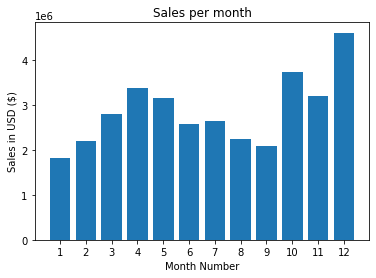

In [116]:
### Making a graph
months = range(1,13)
plt.bar(months, total_sales['Sales'])
plt.title('Sales per month')
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD ($)')
plt.show()

### Answer to Question 1: The month of December had the most sales. It had sales of about 4600000 US Dollars

## Question 2 : What city had the highest number of sales?

In [117]:
### Adding a city column
all_data['City'] = all_data['Purchase Address'].str.split(',', expand=True)[1]
all_data['Column'] = all_data['Purchase Address'].str.split(',', expand=True)[2]
all_data['City'] += str(' ')+all_data['Column'].str.split(' ',expand=True)[1]
all_data = all_data.drop(['Column'],axis=1)

In [118]:
### Grouping based on city
city_sales = all_data.groupby(['City']).sum()
city_sales

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


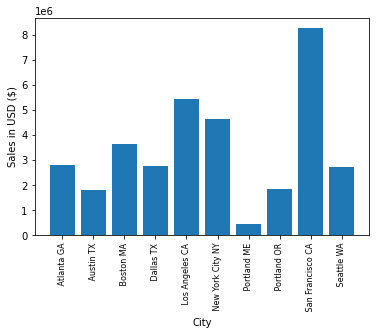

In [119]:
### Making a graph
cities = [city for city, df in all_data.groupby('City')] # to get the x and y data in order
plt.bar(cities,city_sales['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.xlabel('City')
plt.ylabel('Sales in USD ($)')
plt.show()

### Answer to Question 2: San Francisco had the highest number of sales

## Question 3 : What time should we display advertisements to maximize likelihood of customers buying products?

In [120]:
### Adding a time column
all_data['Time'] = all_data['Order Date'].str.split(' ', expand=True)[1]
### Adding a Hour Column
all_data['Hour'] = all_data['Time'].str.split(':', expand=True)[0]
all_data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,00:01,00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,07:03,07
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,18:21,18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,15:13,15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,12:38,12


In [121]:
### Grouping based on Hour
time_sales = all_data.groupby(['Hour']).sum()
time_sales

,Quantity Ordered,Price Each,Month,Sales
Hour,,,,
00,4428,709296.70,27554,713721.27
01,2619,458490.00,16657,460866.88
02,1398,233833.64,8507,234851.44
03,928,144726.42,5904,145757.89
04,937,162058.18,6148,162661.01
05,1493,229621.21,9301,230679.82
06,2810,445000.11,17539,448113.00
07,4556,740568.11,28850,744854.12
08,7002,1185970.62,43626,1192348.97


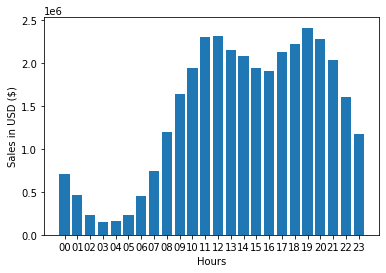

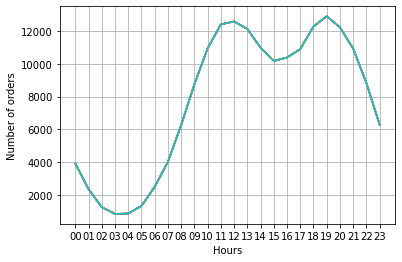

In [122]:
### Making a graph
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.bar(hours,time_sales['Sales'])
plt.xlabel('Hours')
plt.ylabel('Sales in USD ($)')
plt.show()

plt.plot(hours,all_data.groupby(['Hour']).count()) #.count for calculating number of orders at that particular hour
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of orders')
plt.show()

### Answer to Question 3: Advertisements should be displayed around 11am (11) and around 7pm (19)

## Question 4 : What products are most often sold together?

In [123]:
###Selecting all the rows which have the same order id and adding it to a new dataframe
# Referenced: https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
same_sales = all_data[all_data['Order ID'].duplicated(keep=False)]

###Adding a new column 'Grouped' which will contain the items that are brought together for each item in the row
# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
same_sales['Grouped'] = same_sales.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

###There are many duplicate rows with respect to the column Grouped
same_sales = same_sales[['Order ID','Grouped']].drop_duplicates()

same_sales.head()


<ipython-input-123-347760df6329>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  same_sales['Grouped'] = same_sales.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [124]:
###Counting how many times 2 products have been bought together
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in same_sales['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))#2 here because we are looking for two it can be 3 as well
    
for key,value in count.most_common(10):
    print(key,value)
    

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Answer to Question 4: Above is a list of 2 items that are sold together most often

## Question 5 : What product sold the most?Why do you think it did?

In [125]:
###Grouping the data based on the products
product_sales = all_data.groupby(['Product']).sum()
product_sales

,Quantity Ordered,Price Each,Month,Sales
Product,,,,
20in Monitor,4129,451068.99,29336,454148.71
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56
27in FHD Monitor,7550,1125974.93,52558,1132424.50
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01
AA Batteries (4-pack),27635,79015.68,145558,106118.40
AAA Batteries (4-pack),31017,61716.59,146370,92740.83
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43
Flatscreen TV,4819,1440000.00,34224,1445700.00


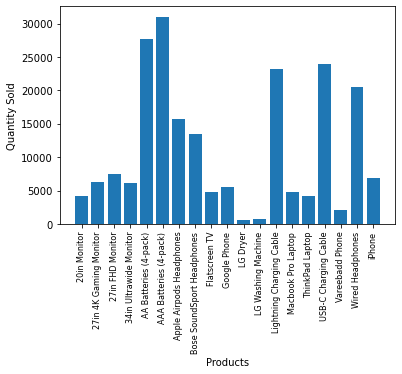

In [126]:
###Making a graph
products = [product for product, df in all_data.groupby('Product')]
plt.bar(products,product_sales['Quantity Ordered'])
plt.xticks(products,rotation='vertical',size=8)
plt.xlabel('Products')
plt.ylabel('Quantity Sold')
plt.show()

<ipython-input-127-89ba505645a5>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


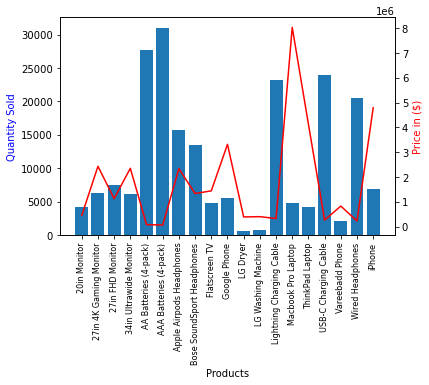

In [127]:
###Adding a secondary Y-Axis for total price of each item sold
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,product_sales['Quantity Ordered'])
ax2.plot(products,product_sales['Price Each'],'r-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Sold',color='b')
ax2.set_ylabel('Price in ($)',color='r')
ax1.set_xticklabels(products,rotation='vertical',size=8)


plt.show()

### Answer to Question 5: The AAA Batteries (4-pack) was sold the most because it's a daily need and also because its price is very low.